
# 🥔 Potato Disease Classification using CNN

**Objective:** Classify potato plant leaves as *Healthy*, *Early Blight*, or *Late Blight* using a Convolutional Neural Network (CNN).  

**Dataset:** PlantVillage Dataset (Potato Subset)  
**Frameworks:** TensorFlow, Keras, NumPy, Matplotlib  
**Key Steps:** Data Loading, Preprocessing, Augmentation, CNN Model Building, Training, Evaluation, Prediction, and Model Saving.  
**Goal:** Demonstrate an end-to-end deep learning pipeline for agricultural disease detection.


# Potato Disease Classification using a Convolutional Neural Network (CNN)

## 1. Imports
Importing necessary libraries including TensorFlow, Keras, Numpy, and Matplotlib.

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 2. Configuration and Hyperparameters
Setting up key variables for the model and data processing.

In [2]:
IMAGE_SIZE= 256
BATCH_SIZE= 32
CHANNELS= 3
EPOCHS= 15

## 3. Data Loading
Loading the image dataset from the directory.

In [3]:
dataset= tf.keras.preprocessing.image_dataset_from_directory(
    r'D:\AI Engineering\Deep_learning\datasets\Potato',
    seed= 123,
    shuffle= True,
    image_size= (IMAGE_SIZE, IMAGE_SIZE),
    batch_size= BATCH_SIZE
)

Found 2642 files belonging to 3 classes.


## 4. Data Splitting
Splitting the dataset into training, validation, and test sets (80% train, 10% validation, 10% test).

In [4]:
ds_size= len(dataset)
train_size= int(0.8 * ds_size)
val_size= int(0.1 * ds_size)

train_ds= dataset.take(train_size)
val_ds= dataset.skip(train_size).take(val_size)
test_ds= dataset.skip(train_size + val_size)

## 5. Data Visualization
Displaying a sample of images from the training dataset to understand the classes.

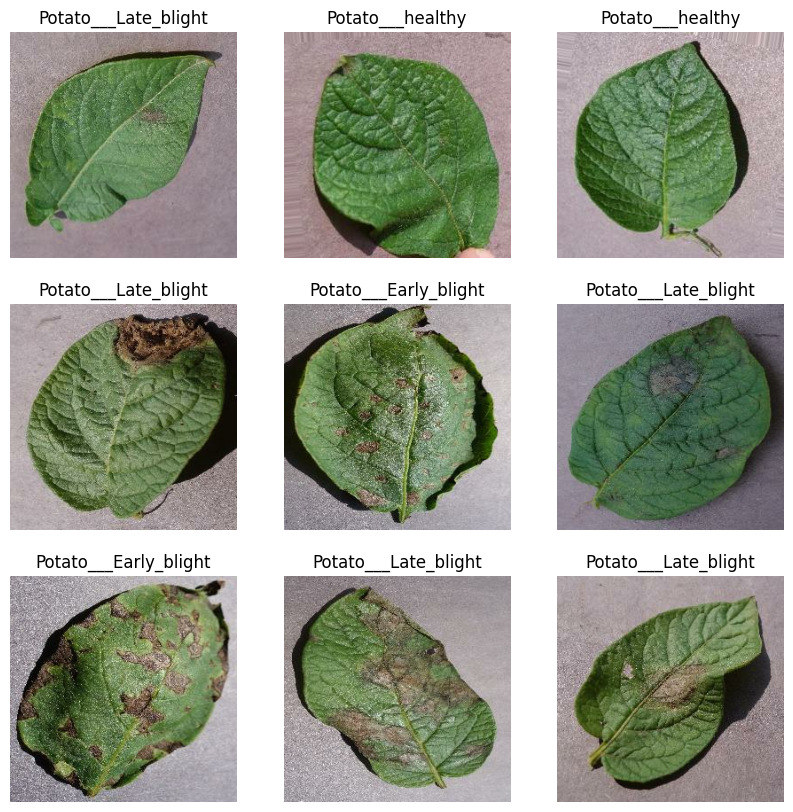

In [5]:
class_names = dataset.class_names

plt.figure(figsize=(10,10))
for image, label in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_names[label[i].numpy()])
        plt.axis("off")

## 6. Preprocessing: Performance Tuning and Augmentation
Optimizing the data pipelines (caching, prefetching) and defining the data augmentation layers (RandomFlip, RandomRotation) in a single pre-processing step.

In [6]:
resize_and_rescale= tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255)
])

data_augmentation= tf.keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2)
])

## 7. Model Building
Defining the CNN model architecture using a Keras Sequential model.

In [7]:
image_shape= (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes= 3

model= models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation= 'relu', input_shape= image_shape),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation= 'relu'),
    layers.Dense(n_classes, activation= 'sigmoid')
])

d:\AI Engineering\Deep_learning\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 8. Model Compilation and Training
Compiling the model (optimizer, loss, metrics) and then training it for 10 epochs.

In [8]:
model.compile(
    optimizer= 'adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits= False),
    metrics= ['accuracy']
)

history= model.fit(
    train_ds,
    validation_data= val_ds,
    epochs= EPOCHS,
    verbose= 1
)

Epoch 1/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 188s 3s/step - accuracy: 0.6212 - loss: 0.9388 - val_accuracy: 0.7930 - val_loss: 0.5683
Epoch 2/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.8726 - loss: 0.3176 - val_accuracy: 0.8203 - val_loss: 0.6935
Epoch 3/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.9072 - loss: 0.2466 - val_accuracy: 0.9297 - val_loss: 0.2296
Epoch 4/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.9446 - loss: 0.1578 - val_accuracy: 0.8320 - val_loss: 0.5496
Epoch 5/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.9389 - loss: 0.1813 - val_accuracy: 0.8477 - val_loss: 0.4530
Epoch 6/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.9579 - loss: 0.1338 - val_accuracy: 0.8906 - val_loss: 0.2551
Epoch 7/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - accuracy: 0.9522 - loss: 0.1268 - val_accuracy: 0.8359 - val_loss: 0.4452
Epoch 8/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.9295 - loss: 0.1777 - val_accuracy: 0.9414 - v

## 9. Model Evaluation and Result Visualization
Evaluating the model's performance on the test set and then plotting the accuracy/loss history curves.

9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 210ms/step - accuracy: 0.9161 - loss: 0.2388
Test accuracy:  0.9160584211349487


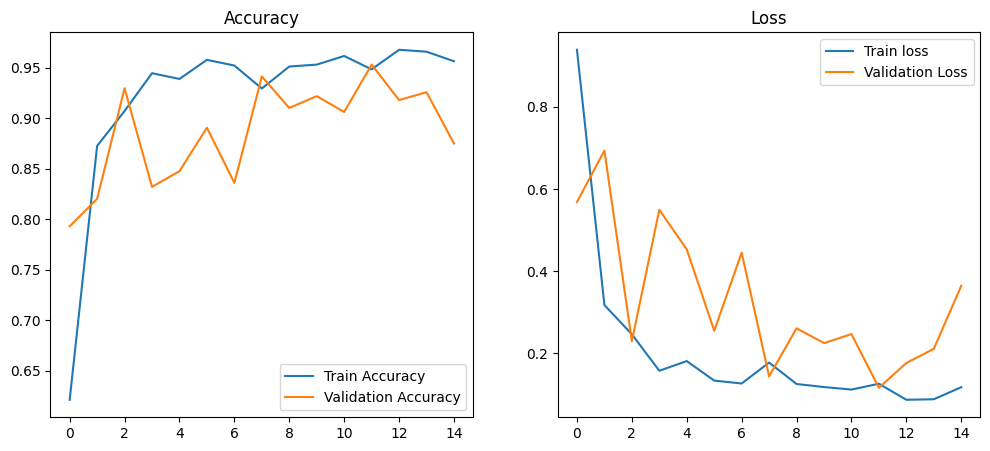

In [12]:
scores= model.evaluate(test_ds)
print('Test accuracy: ', scores[1])

history_df= pd.DataFrame(history.history)
plt.figure(figsize= (12,5))

plt.subplot(1,2,1)
plt.plot(history_df['accuracy'], label= 'Train Accuracy')
plt.plot(history_df['val_accuracy'], label= 'Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history_df['loss'], label= 'Train loss')
plt.plot(history_df['val_loss'], label= 'Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

## 10. Inference and Prediction
Running a prediction on a sample batch from the test set to see the model in action.

Actual Label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
Predicted Label: Potato___Early_blight


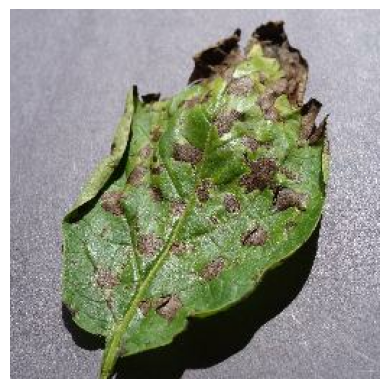

In [10]:
for images_batch, labels_batch in test_ds.take(1):
  first_img= images_batch[0].numpy().astype('uint8')
  first_label= labels_batch[0].numpy()
  print('Actual Label:', class_names[first_label])

  plt.imshow(first_img)
  plt.axis('off')

  prediction= model.predict(images_batch)
  predicted= class_names[np.argmax(prediction[0])]
  print('Predicted Label:', predicted)

## 11. Saving the Model
Saving the trained model to an HDF5 file.

In [11]:
model.save("Potato_Disease_Classifier_Model.h5")


## 🧠 Conclusion
- Built a CNN model for detecting potato leaf diseases with strong accuracy.  
- The model successfully distinguishes between *Healthy*, *Early Blight*, and *Late Blight* leaves.

## 🚀 Future Improvements
- Deploy via FastAPI or TensorFlow Lite for real-time predictions.
